### ML- CUSTOMER CHURN FOR A TELECOMMUNICATION COMPANY

##### Author  : Adeyemi Bolaji

### Dataset Description

Each row represents a customer, each column contains customer’s attributes described below;
* Gender - If the customer is a male or a female
* Senior Citizen - If the customer is a senior citizen or not (1, 0)
* Partner - If the customer has a partner or not (Yes, No)
* Dependents - If the customer has dependents or not (Yes, No)
* Tenure - Number of months the customer has stayed with the company
* PhoneService - If the customer has a phone service or not (Yes, No)
* MultipleLines - If the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* Contract - Types contract the customer uses (Month-to-month, One year, Two year)
etc.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

#### Data Source - Kaggle

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
%pwd

'C:\\Users\\bolaj\\Desktop\\Python notebook\\Customer-churn'

In [3]:
cc = pd.read_csv('C:\\Users\\bolaj\\Desktop\\Desk\\Data\\Telco-Customer-Churn.csv')

### Data Inspection

In [4]:
cc.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
cc.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
cc.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1677,3283-WCWXT,Male,0,Yes,Yes,6,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.4,153.3,No
5606,6586-PSJOX,Male,0,No,Yes,15,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Credit card (automatic),55.2,864.55,No
85,4445-ZJNMU,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.3,918.75,No


In [9]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
cc.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
cc.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
cc.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
cc.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [14]:
#Changing Total charges from object to numbers
cc.TotalCharges = pd.to_numeric(cc.TotalCharges, errors='coerce')
cc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
cc.customerID.nunique()

7043

In [16]:
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
cc['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
cc[cc['tenure']==72]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,No
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962.00,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,8468-FZTOE,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.40,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

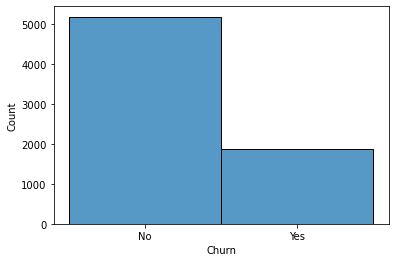

In [19]:
sns.histplot(cc , x='Churn',bins=70)

<AxesSubplot:xlabel='Contract', ylabel='Count'>

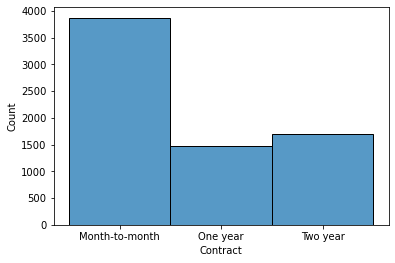

In [20]:
sns.histplot(cc , x='Contract',bins=70)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

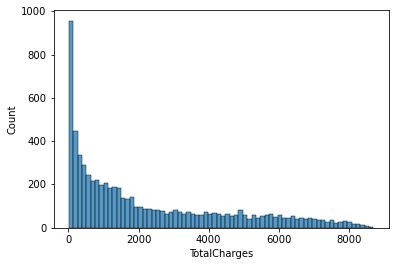

In [21]:
sns.histplot(cc , x='TotalCharges',bins=70)

### Dealing with the null Value

* Contract have a realtionship with the total charges. Which is a perfect feature to determine the Total charges.

In [22]:
cc.loc[cc['TotalCharges'].isnull()].sample(frac=0.25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [23]:
#Contract type is a major factor that determines each customers Total Charge
cc['TotalCharges'] =(cc
                .groupby(['Contract','gender'],sort=False)['TotalCharges']
                .apply(lambda x : x.fillna(round(x.mean(),1)))
                         )

In [24]:
cc[cc['TotalCharges'].isnull()].sample(frac=0.25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Data Visualisation

* Checking the relationship between the Contract Types and Churn using count plot
* Checking the Monthly charges relationship with Churn using Boxplot and Violin plot

### Discoveries
##### Comparing Monthly contract to Others (Yearly and Bi-yearly)
* Month to Month Groups had higher rate of churn ,because customers committment or rentention is not guaranteed compare to Yearly contract. 


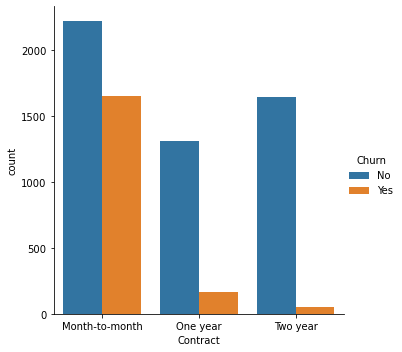

In [25]:
sns.catplot(data=cc, x="Contract", hue="Churn" , kind='count')

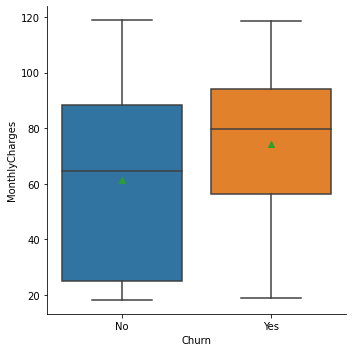

In [26]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='box', showmeans= True)

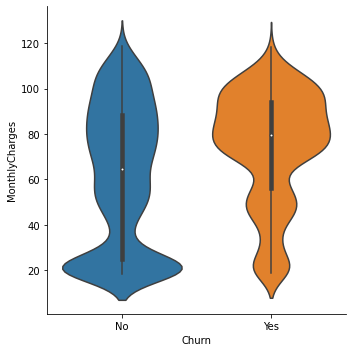

In [27]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='violin', showmeans= True)

<AxesSubplot:>

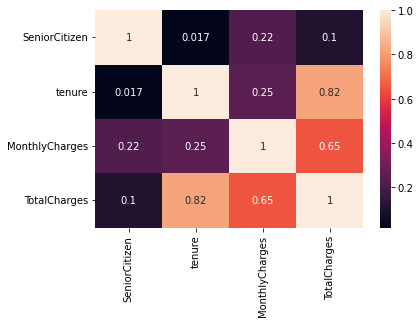

In [28]:
sns.heatmap(cc.corr(),annot=True )

Stacked barchart code gotten from kaggle search , but modified into a function

In [29]:
def stack_plot(cc,id_vars,value_vars,x,y,z,a,b):
    cc = pd.melt(cc, id_vars, value_vars)
    df3 = cc.groupby([x,y]).count().unstack()
    df3 = df3*100/len(cc)
    colors = ['#4D3425','#E4512B']
    ax = df3.loc[:,z].plot.bar(stacked=True, color=colors,
                                          figsize=(8,6),rot = 0,
                                         width = 0.2)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(a,size = 14)
    ax.set_xlabel('')
    ax.set_title(b,size = 14)
    ax.legend(loc = 'center',prop={'size':14})

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 14)


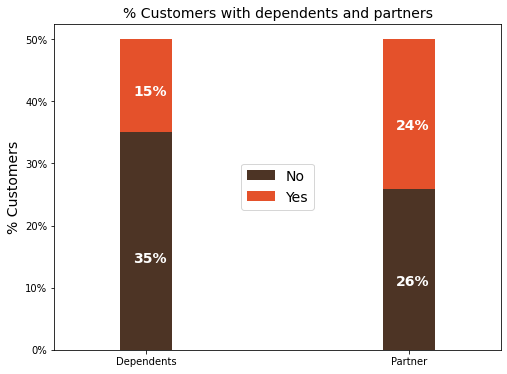

In [30]:
stack_plot(cc,'customerID',['Dependents','Partner'],'variable','value','customerID','% Customers','% Customers with dependents and partners')

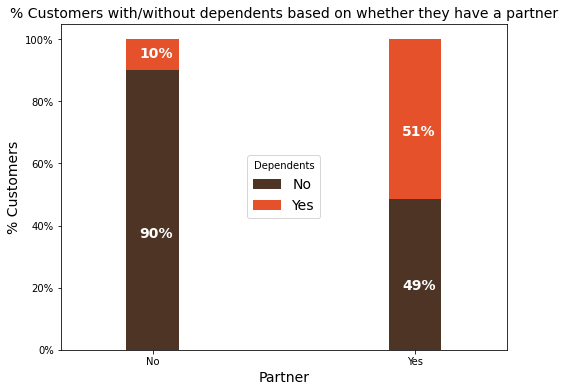

In [31]:
colors = ['#4D3425','#E4512B']
partner_dependents = cc.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### Machine Learning 

* Trying Random Forest ,Xg_boost

In [32]:
#astype can also be used to convert it from catergories 
cc['Churn'] = cc['Churn'].astype('category').cat.codes

In [33]:
cc[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']] = cc[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']].astype('object')


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
cc.set_index('customerID',inplace=True)

In [36]:
X = cc.drop(['Churn'],axis=1)

y = cc['Churn']
X.shape, y.shape

((7043, 19), (7043,))

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(
    cc.drop(['Churn'],axis=1), cc['Churn'],
     test_size=0.25, random_state=0,
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5282, 19), (5282,), (1761, 19), (1761,))

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder

#import pipeline and transformers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


import time

In [39]:
Target_encoding = make_pipeline(
  TargetEncoder(
        handle_unknown='value'
    ),
)
Target_encoding

Pipeline(steps=[('targetencoder', TargetEncoder())])

In [40]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
2229-VWQJH,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
7994-XIRTR,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6338-AVWCY,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
0704-VCUMB,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [41]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [42]:
#Configure Time
start_time=time.time()

In [43]:
category_column =['gender','Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
preprocessor = ColumnTransformer(
    transformers=[
        ('TargetEncoder',Target_encoding,category_column)
    ],
    remainder='passthrough',
    verbose=0
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('TargetEncoder',
                                 Pipeline(steps=[('targetencoder',
                                                  TargetEncoder())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])],
                  verbose=0)

In [44]:
X_train.shape

(5282, 19)

In [45]:
DecisionTreepipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("DecisionTreeClassifier", DecisionTreeClassifier(
        ))
    ]
)
DecisionTreepipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [46]:
RandomForestpipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("RandomForestClassifier", RandomForestClassifier(
        ))
    ]
)
RandomForestpipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('RandomForestClassifier', RandomForestClassifier())])

In [47]:
X_train.shape

(5282, 19)

In [48]:
preprocessor.fit_transform(X_train,y_train)

array([[0.2728986053524312, 0.3301505692251194, 0.31509076131129776, ...,
        24, 49.3, 1233.25],
       [0.2594142259414226, 0.3301505692251194, 0.31509076131129776, ...,
        54, 65.25, 3529.95],
       [0.2594142259414226, 0.3301505692251194, 0.31509076131129776, ...,
        3, 40.15, 130.75],
       ...,
       [0.2594142259414226, 0.1981242672919109, 0.31509076131129776, ...,
        58, 20.75, 1185.95],
       [0.2594142259414226, 0.3301505692251194, 0.31509076131129776, ...,
        1, 69.75, 69.75],
       [0.2728986053524312, 0.3301505692251194, 0.15273412947831552, ...,
        4, 20.4, 94.5]], dtype=object)

In [49]:
DecisionTreepipeline.fit(X_train,y_train)
DecisionTreepipeline.score(X_train, y_train), DecisionTreepipeline.score(X_test, y_test)
DT_elapsed_time= time.time()-start_time

In [50]:
y_pred_Dt = DecisionTreepipeline.predict(X_test)
y_pred_Dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [51]:
Dt_acc = accuracy_score(y_test, y_pred_Dt)
Dt_prec = precision_score(y_test, y_pred_Dt)
Dt_rec = recall_score(y_test, y_pred_Dt)
Dt_f1 = f1_score(y_test, y_pred_Dt)
Dt_roc = roc_auc_score(y_test, y_pred_Dt)
Dt_class_report = classification_report(y_test, y_pred_Dt)


In [52]:
Dt_test_score = balanced_accuracy_score(
    y_test,
    DecisionTreepipeline.predict(X_test)
)

In [53]:
print(f'DecisionTree Classifier: {Dt_test_score:.2f}')
print("Elapsed Time : %5f seconds"%DT_elapsed_time)
print("Accuracy: ", Dt_acc)
print("Precision: ", Dt_prec)
print("Recall: ", Dt_rec)
print("F1 Score: ", Dt_f1)
print("AUC-ROC: ", Dt_roc)
print("Classification Report:\n", Dt_class_report)

DecisionTree Classifier: 0.66
Elapsed Time : 6.999856 seconds
Accuracy:  0.7348097671777399
Precision:  0.4956521739130435
Recall:  0.4924406047516199
F1 Score:  0.49404117009750814
AUC-ROC:  0.6568520435160257
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1298
           1       0.50      0.49      0.49       463

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761



In [54]:
RandomForestpipeline.fit(X_train,y_train)
RandomForestpipeline.score(X_train, y_train), RandomForestpipeline.score(X_test, y_test)
Rf_elapsed_time= time.time()-start_time

In [55]:
y_pred_Rf = RandomForestpipeline.predict(X_test)
y_pred_Rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [56]:
Rf_test_score = balanced_accuracy_score(
    y_test,
    RandomForestpipeline.predict(X_test)
)

In [57]:
Rf_acc = accuracy_score(y_test, y_pred_Rf)
Rf_prec = precision_score(y_test, y_pred_Rf)
Rf_rec = recall_score(y_test, y_pred_Rf)
Rf_f1 = f1_score(y_test, y_pred_Rf)
Rf_roc = roc_auc_score(y_test, y_pred_Rf)
Rf_class_report = classification_report(y_test, y_pred_Rf)

In [58]:
print(f'RandomForest Classifier: {Rf_test_score:.2f}')
print("Elapsed Time : %5f seconds"%Rf_elapsed_time)
print("Accuracy: ", Rf_acc)
print("Precision: ", Rf_prec)
print("Recall: ", Rf_rec)
print("F1 Score: ", Rf_f1)
print("AUC-ROC: ", Rf_roc)
print("Classification Report:\n", Rf_class_report)

RandomForest Classifier: 0.69
Elapsed Time : 13.157731 seconds
Accuracy:  0.7859170925610448
Precision:  0.6137566137566137
Recall:  0.5010799136069114
F1 Score:  0.5517241379310344
AUC-ROC:  0.6942995870037638
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1298
           1       0.61      0.50      0.55       463

    accuracy                           0.79      1761
   macro avg       0.72      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [59]:
model_scores =[]

In [60]:
column_name= ['model','Precision','Accuracy','ELAPSED_TIME']
scores = [('RandomForest Classifier', Rf_prec,Rf_acc ,Rf_elapsed_time),
        ('DecisionTree Classifier', Rf_prec,Dt_acc,DT_elapsed_time )]


model_scores = pd.DataFrame(scores,
                            columns=column_name).sort_values(by=['Accuracy','ELAPSED_TIME'], ascending=[False,True]).set_index('model')

In [61]:
model_scores

,Precision,Accuracy,ELAPSED_TIME
model,,,
RandomForest Classifier,0.613757,0.785917,13.157731
DecisionTree Classifier,0.613757,0.734810,6.999856


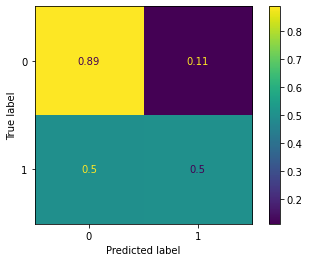

In [62]:
cm = confusion_matrix(
    y_test, y_pred_Rf,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [63]:
param_grid = {
    'max_depth': [ 2, 5, 8, 11, 13 ],
    'min_samples_split': [ 10, 12, 3 ],
    'min_samples_leaf': [ 4, 8, 12]
}

In [64]:
grid = GridSearchCV(
    RandomForestClassifier(), param_grid, scoring='balanced_accuracy', return_train_score=True
)

In [65]:
grid_X_train = preprocessor.fit_transform(X_train,y_train)

In [66]:
grid.fit(grid_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 11, 13],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [10, 12, 3]},
             return_train_score=True, scoring='balanced_accuracy')

In [67]:
gs_results = pd.DataFrame(grid.cv_results_)

In [68]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [69]:
gs_results[
    ['param_max_depth', 'param_min_samples_split', 'mean_train_score', 
     'mean_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

,param_max_depth,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
23,8,3,0.751859,0.716593,1
22,8,12,0.749716,0.715263,2
34,11,12,0.750199,0.715005,3
26,8,3,0.744237,0.715002,4
37,13,12,0.802708,0.714945,5
20,8,3,0.762879,0.714915,6
44,13,3,0.750480,0.714617,7
29,11,3,0.806612,0.714294,8
43,13,12,0.752831,0.714199,9
25,8,12,0.744175,0.713611,10


In [70]:
best_dt = grid.best_estimator_
best_dt

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=3)

In [71]:
RandomForestpipeline2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("RandomForestClassifier", RandomForestClassifier(max_depth=13, min_samples_leaf=12, min_samples_split=12
        ))
    ]
)
RandomForestpipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_depth=13, min_samples_leaf=12,
                                        min_samples_split=12))])

In [77]:
RandomForestpipeline2.fit(X_train,y_train)
RandomForestpipeline2.score(X_train, y_train), RandomForestpipeline2.score(X_test, y_test)
Rf2_elapsed_time= time.time()-start_time

In [78]:
y_pred_Rf2 = RandomForestpipeline.predict(X_test)
y_pred_Rf2

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [79]:
Rf2_test_score = balanced_accuracy_score(
    y_test,
    RandomForestpipeline2.predict(X_test)
)

In [80]:
Rf2_acc = accuracy_score(y_test, y_pred_Rf)
Rf2_prec = precision_score(y_test, y_pred_Rf)
Rf2_rec = recall_score(y_test, y_pred_Rf)
Rf2_f1 = f1_score(y_test, y_pred_Rf)
Rf2_roc = roc_auc_score(y_test, y_pred_Rf)
Rf2_class_report = classification_report(y_test, y_pred_Rf)

In [81]:
print(f'RandomForest Classifier: {Rf2_test_score:.2f}')
print("Elapsed Time : %5f seconds"%Rf2_elapsed_time)
print("Accuracy: ", Rf2_acc)
print("Precision: ", Rf2_prec)
print("Recall: ", Rf2_rec)
print("F1 Score: ", Rf2_f1)
print("AUC-ROC: ", Rf2_roc)
print("Classification Report:\n", Rf2_class_report)

RandomForest Classifier: 0.70
Elapsed Time : 418.439139 seconds
Accuracy:  0.7859170925610448
Precision:  0.6137566137566137
Recall:  0.5010799136069114
F1 Score:  0.5517241379310344
AUC-ROC:  0.6942995870037638
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1298
           1       0.61      0.50      0.55       463

    accuracy                           0.79      1761
   macro avg       0.72      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



#### CHECKING FEATURE IMPORTANCE

In [82]:
from eli5.sklearn import PermutationImportance
import eli5

In [83]:
RandomForestpipeline2.named_steps['RandomForestClassifier'].feature_importances_

array([0.01072629, 0.00879541, 0.0067644 , 0.00257097, 0.01667683,
       0.05725905, 0.09837109, 0.02644092, 0.01945445, 0.05061945,
       0.01496303, 0.01503126, 0.16445348, 0.01445361, 0.06565961,
       0.00883612, 0.1763043 , 0.10548415, 0.13713558])

In [84]:
RandomForestpipeline2.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [85]:

len(RandomForestpipeline2.named_steps['RandomForestClassifier'].feature_importances_) == len(RandomForestpipeline2.feature_names_in_)


True

In [86]:
feat_imp = pd.DataFrame(
     RandomForestpipeline2.named_steps['RandomForestClassifier'].feature_importances_,
     index=RandomForestpipeline2.feature_names_in_,
     columns=['feat_imp']
)
feat_imp.sort_values('feat_imp',ascending=False).head(10)

,feat_imp
PaymentMethod,0.176304
StreamingTV,0.164453
TotalCharges,0.137136
MonthlyCharges,0.105484
MultipleLines,0.098371
Contract,0.065660
PhoneService,0.057259
OnlineBackup,0.050619
InternetService,0.026441
OnlineSecurity,0.019454


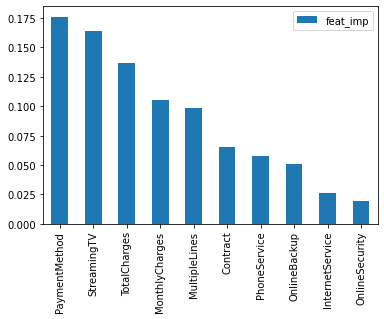

In [88]:
feat_imp.sort_values('feat_imp',ascending=False).head(10).plot.bar();

In [89]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
